### Median Sales Price of Houses Sold for the United States 

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#### Data

The time series data contains the information about median sales price of houses in the USA from 1963 to 2023

In [2]:
df=pd.read_csv('/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Autograded Assignments/Timeseries/MSPUS.csv')

In [3]:
df

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
237,2022-04-01,449300.0
238,2022-07-01,468000.0
239,2022-10-01,479500.0
240,2023-01-01,429000.0


In [4]:
df.shape

(242, 2)

In [5]:
df.describe()

,MSPUS
count,242.000000
mean,150280.991736
std,111227.130197
min,17800.000000
25%,53575.000000
50%,126900.000000
75%,228625.000000
max,479500.000000


### Plot the time series, along with any logical or necessary differences to get a stationary dataset.

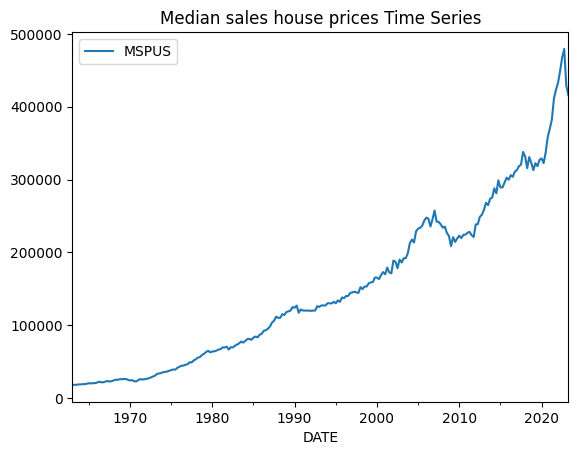

In [6]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Median sales house prices Time Series')
plt.show()

The time series shows a mostly increasing trend. the mean price is obviously not constant for each variable as well as the variance.
The make the data stotionary, we have to get the differences. 

In [7]:
#x = df['DATE']
#x = pd.to_datetime(x)
#y=df.MSPUS
#plt.scatter(x, y)

#y = df['MSPUS'].tolist()
#x = mdates.date2num(list(pd.to_datetime(x)))
#z = np.polyfit(x,y,1)
#p = np.poly1d(z)
#df.plot('DATE', 'MSPUS')
#plt.plot(x, p(x), "r--")

#### Making the data stationary

Text(0.5, 1.0, 'Median sales house prices Time Series')

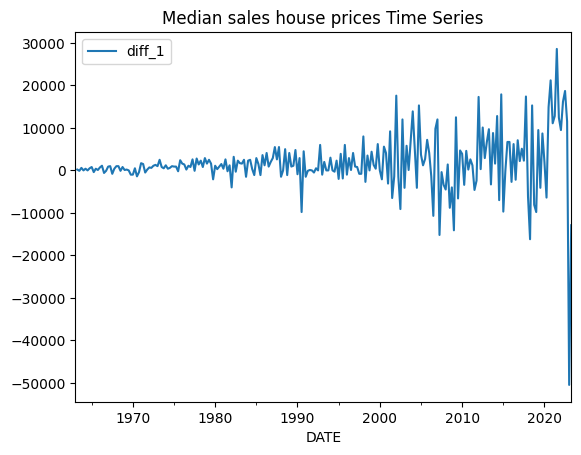

In [8]:
df['diff_1'] = df.MSPUS - df.MSPUS.shift()
df.plot(y='diff_1')
plt.title('Median sales house prices Time Series')

The stationary condition being satisfied, we can move on to the next step.

### Generate and interpret a PACF for the time series and discuss any differences in correlations.

We will look at the PACF for both the initial and differenced time series:

#### With the initial time series data

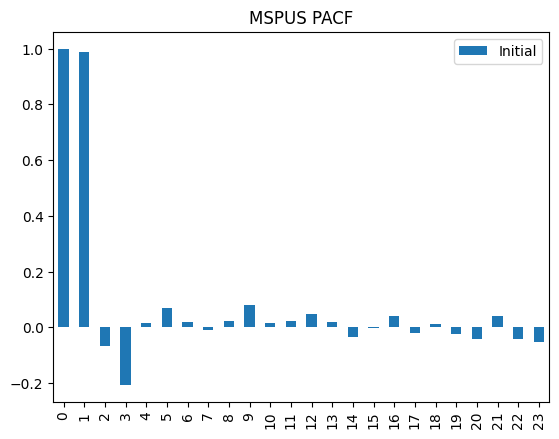

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.MSPUS))
x_acf.plot(kind='bar')
plt.title("MSPUS PACF")
plt.legend(['Initial'])

<Figure size 2000x1200 with 0 Axes>

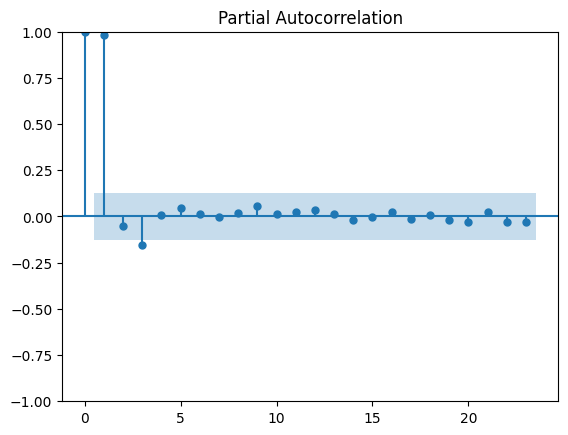

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=(20, 12))

fig = plot_pacf(df.MSPUS, lags=23)

#### With the diference time series data

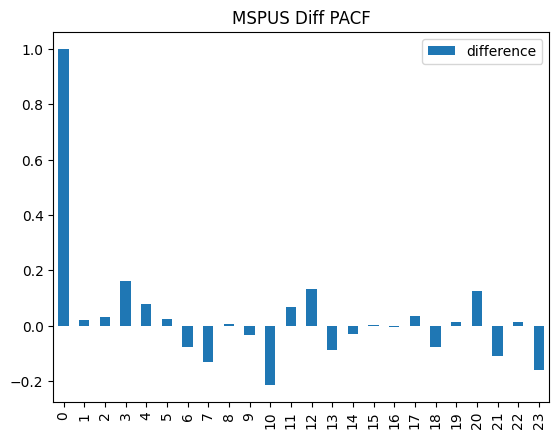

In [11]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("MSPUS Diff PACF")
plt.legend(['difference'])

<Figure size 2000x1200 with 0 Axes>

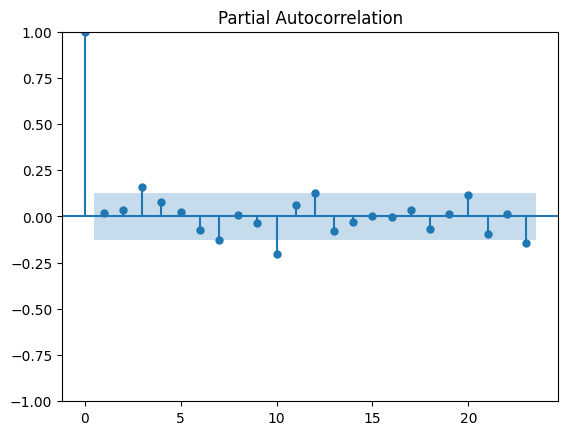

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=(20, 12))

fig = plot_pacf(df.diff_1[1:], lags=23)

The initial shows two strong autocorrelation, this pattern indicates an autoregressive term of order 2.
However, the difference shows only one correlation: this pattern indicates an autoregressive term of order 1.

### Generate five ARIMA specifications and evaluate their efficacy at modeling your data.

In [13]:
from statsmodels.tsa.arima.model import ARIMA

#### ARIMA (0,1,0)

In [14]:
model = ARIMA(df.MSPUS, order=(0,1,0))
model_fit = model.fit()
print('Residuals Description')
print(model_fit.resid.describe())

Residuals Description
count      242.000000
mean      1719.421488
std       6811.674966
min     -50500.000000
25%       -300.000000
50%        900.000000
75%       3575.000000
max      28600.000000
dtype: float64


/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [15]:
#model_fit.resid.plot()

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MSPUS   No. Observations:                  242
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2473.347
Date:                Fri, 08 Sep 2023   AIC                           4948.693
Time:                        16:17:16   BIC                           4952.178
Sample:                    01-01-1963   HQIC                          4950.097
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.785e+07   1.61e+06     29.772      0.000    4.47e+07     5.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              2481.01
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              70.80   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Histogram of Residuals')

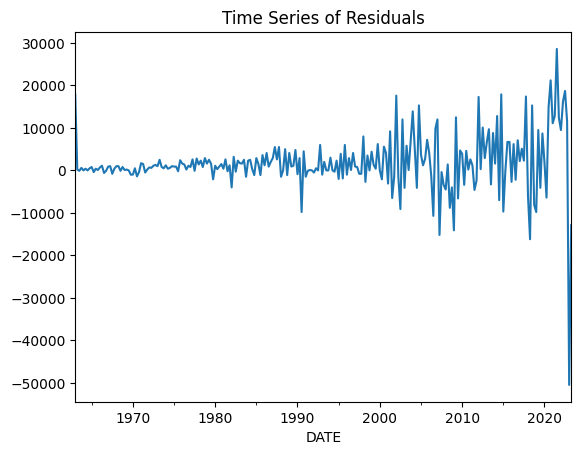

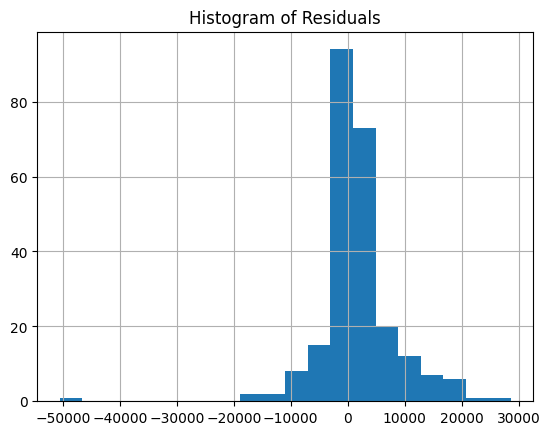

In [17]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

There isn't a clear trend to the data indicating an obviously missed seasonality. \
The residuals seem to approximate a normal distribution. \
Then the residuals seem random and normally distributed

#### ARIMA (1,1,0)

In [18]:
model = ARIMA(df.MSPUS, order=(1,1,0))
model_fit = model.fit()
print('Residuals Description')
print(model_fit.resid.describe())

Residuals Description
count      242.000000
mean      1581.371227
std       6823.568901
min     -51396.312033
25%       -478.009857
50%        887.647859
75%       3528.201054
max      27602.365737
dtype: float64


/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MSPUS   No. Observations:                  242
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2472.604
Date:                Fri, 08 Sep 2023   AIC                           4949.207
Time:                        16:17:17   BIC                           4956.177
Sample:                    01-01-1963   HQIC                          4952.015
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0779      0.040      1.960      0.050    5.06e-06       0.156
sigma2      4.795e+07   3.45e-10   1.39e+17      0.000     4.8e+07     4.8e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):              2673.13
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):              71.01   Skew:                            -1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Histogram of Residuals')

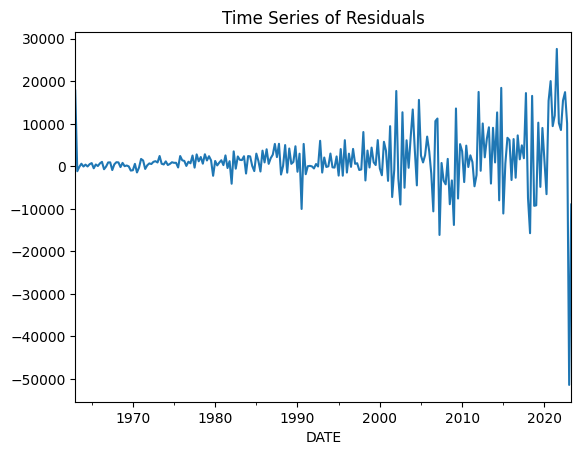

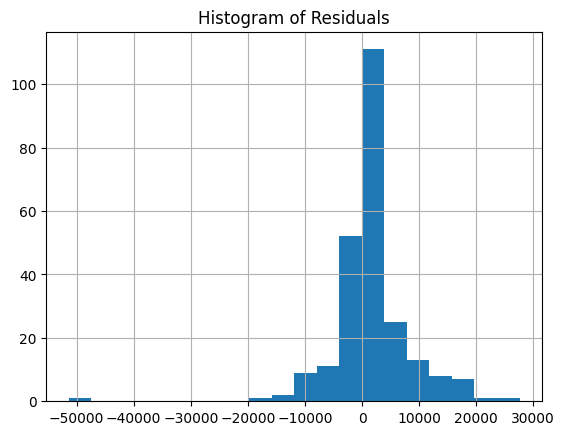

In [20]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

#### ARIMA (0,1,1)

In [21]:
model = ARIMA(df.MSPUS, order=(0,1,1))
model_fit = model.fit()
print('Residuals Description')
print(model_fit.resid.describe())

Residuals Description
count      242.000000
mean      1608.417814
std       6820.303301
min     -51195.411718
25%       -442.932373
50%        894.567735
75%       3530.461788
max      27780.922253
dtype: float64


/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MSPUS   No. Observations:                  242
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2472.733
Date:                Fri, 08 Sep 2023   AIC                           4949.466
Time:                        16:17:17   BIC                           4956.435
Sample:                    01-01-1963   HQIC                          4952.273
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0675      0.042      1.589      0.112      -0.016       0.151
sigma2      4.877e+07    2.9e-10   1.68e+17      0.000    4.88e+07    4.88e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):              2621.70
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):              70.86   Skew:                            -1.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Histogram of Residuals')

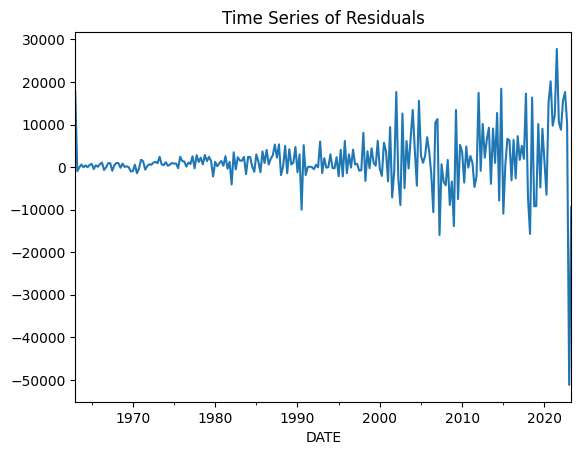

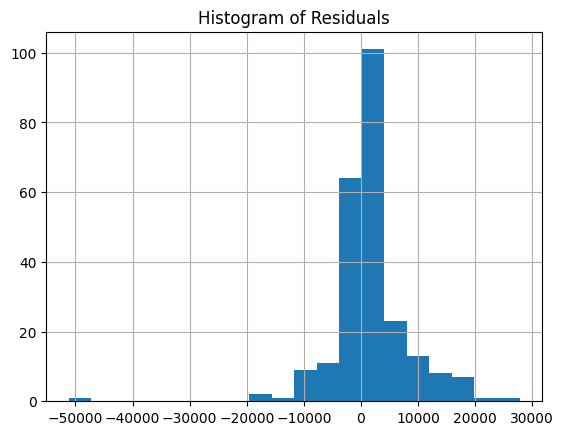

In [23]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

#### ARIMA (2,1,0)

In [24]:
model = ARIMA(df.MSPUS, order=(2,1,0))
model_fit = model.fit()
print('Residuals Description')
print(model_fit.resid.describe())

Residuals Description
count      242.000000
mean      1348.517290
std       6833.160654
min     -53605.245578
25%       -693.470442
50%        749.337195
75%       3044.400835
max      26310.160955
dtype: float64


/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MSPUS   No. Observations:                  242
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2471.207
Date:                Fri, 08 Sep 2023   AIC                           4948.415
Time:                        16:17:17   BIC                           4958.869
Sample:                    01-01-1963   HQIC                          4952.626
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0748      0.044      1.696      0.090      -0.012       0.161
ar.L2          0.1201      0.041      2.940      0.003       0.040       0.200
sigma2      4.757e+07    6.1e-10    7.8e+16      0.000    4.76e+07    4.76e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):              3535.41
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):              74.90   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+32. Standard errors may be unstable.
"""

Text(0.5, 1.0, 'Histogram of Residuals')

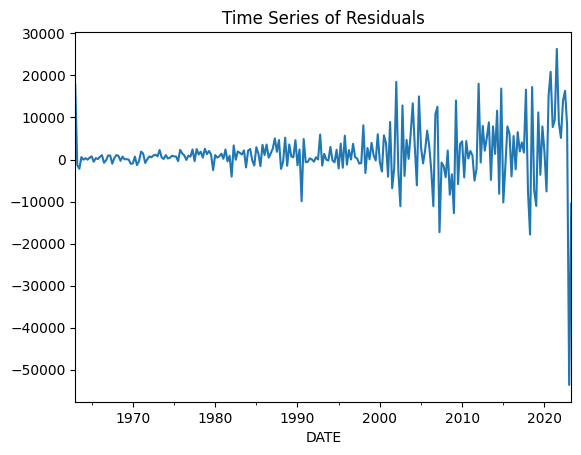

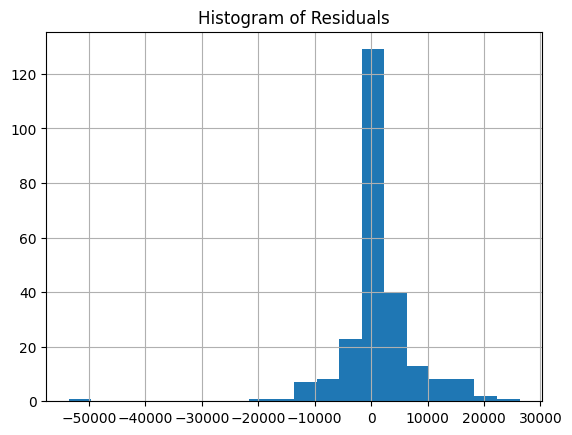

In [26]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

#### ARIMA (1,1,1)

In [27]:
model = ARIMA(df.MSPUS, order=(1,1,1))
model_fit = model.fit()
print('Residuals Description')
print(model_fit.resid.describe())

Residuals Description
count      242.000000
mean       981.588687
std       6822.796924
min     -56233.842633
25%       -959.593919
50%        580.005286
75%       2715.985528
max      24583.199079
dtype: float64


/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/angelo/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MSPUS   No. Observations:                  242
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2468.654
Date:                Fri, 08 Sep 2023   AIC                           4943.308
Time:                        16:17:18   BIC                           4953.762
Sample:                    01-01-1963   HQIC                          4947.520
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8472      0.074     11.418      0.000       0.702       0.993
ma.L1         -0.7428      0.108     -6.874      0.000      -0.955      -0.531
sigma2      4.545e+07    3.8e-09   1.19e+16      0.000    4.54e+07    4.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.69   Jarque-Bera (JB):              4804.77
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):              77.91   Skew:                            -2.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+32. Standard errors may be unstable.
"""

Text(0.5, 1.0, 'Histogram of Residuals')

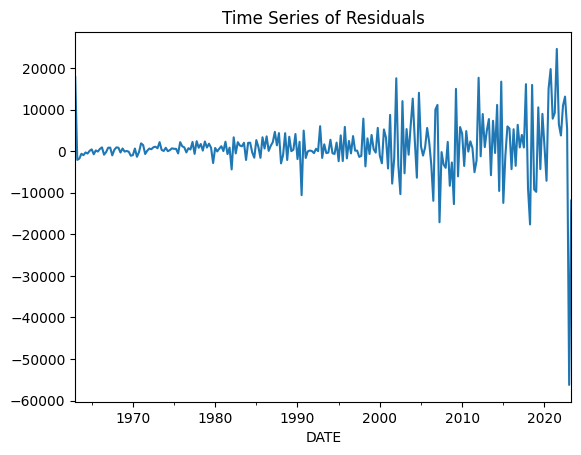

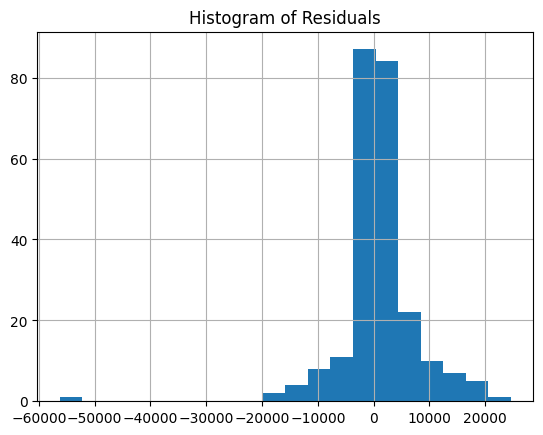

In [29]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

#### Pvalues

For all the models, the Pvalues of auto regression and moving average models are not significant. This shows that ARIMA(0,1,0) seems to be the clearest choice for the model.

####  log-likelihood

All log-likelihood are far away from the perfect value which is zero. The closer to 0, the higher the probability that you can predict the outcome with your given model. Which shows that none of the models can really predict predict the median house sales price. However let's look at the other evaluation metrics.

#### Residuals

There isn't a clear trend to the data indicating an obviously missed seasonality. \
The residuals seem to approximate a normal distribution. \
Then the residuals seem random and normally distributed

#### Comparing with AIC

The AIC values are pretty close. with the lowest value for ARIMA(1,1,1) followed by ARIMA(0,1,0)

### Conclusion

With all the models. ARIMA(0,1,0) seems to be the better model to use. \
ARIMA(1,1,1) might runs really close to be the best model, too.